# <font color='red'><ins>Práctica 3 FAA - Clasificación mediante Algoritmos Genéticos</ins></font>
## Alejandro Santorum Varela - alejandro.santorum@estudiante.uam.es
## José Manuel Chacón Aguilera - josem.chacon@estudiante.uam.es

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')

In [3]:
# My modules
from Datos import Datos
import EstrategiaParticionado
import Clasificador

# External modules
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Important to pre-install tabulate (pip install tabulate)
from tabulate import tabulate

# Init class Classifier
clasificador = Clasificador.Clasificador()

In [4]:
db_titanic = Datos('../ConjuntosDatos/titanic.data', col_custom_dtypes={'Pclass':str, 'Age':str, 'class':str})
n,m = db_titanic.datos.shape
print("Numero de ejemplos:", n,"| Numero de columnas:", m)

datosenc = Datos.encodeDatos(db_titanic.datos)
n,m = datosenc.shape
print("Numero de ejemplos:", n,"| Numero de columnas (ENCODE):", m)

Numero de ejemplos: 1046 | Numero de columnas: 4
Numero de ejemplos: 1046 | Numero de columnas (ENCODE): 22


In [10]:
print(db_titanic.datos[0])
print(datosenc[0])

[1. 1. 9. 1.]
[0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1]


In [6]:
# Entrenamiento. Consiste en sacar el individuo "ÓPTIMO".

    # - Definir la función/funciones de cruce
    # - Definir la mutación/mutaciones
    # - Definir la función/funciones de adaptación
    
    # ------------> Si nos calentamos, implementamos varias de estas y las consideramos hiper-parámetros del algoritmo.
    
# Clasificación. Consiste en comparar los genes de tu ejemplo con el individuo obtenido anteriormente, si tiene una codificación
# genética "parecida" codificas como superviviente.
    # Definir que es "parecido". 


In [7]:
# El INIT que tienes implementado no lo comprendo muy bien ni tampoco se usarlo, este solo es de prueba, 
# genera cadenas (sin sentido) para que pueda implementar primeras versiones tanto del cruze como de la mutación
npop = 100
population = []
max_rules = 5

for i in range(npop):
    # Creating a new individual, represented as a list of rules
    new_individual = []
    # The number of rules of the individual is chosen randomly,
    # between 1 (minimum number of rules) and 'self.max_rules'
    n_rules = random.randint(1, max_rules)
    for j in range(n_rules): # Creating 'n_rules' new rules
        # Asserting that new rule cannot have EVERY gene equal 0 or 1
        new_rule = []
        while sum(new_rule)==0 or sum(new_rule)==len(new_rule):
            # Creating a new rule as a random binary string of size 'feat_size' + 1 (predicted class)
            new_rule = random.choices([0,1], k = m)
        # Inserting new rule to the new individual
        new_individual.append(new_rule)
            
    # Inserting new individual to initial population
    population.append(new_individual)
    
print(population[3], len(population[3]))

[[1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0], [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1], [1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1]] 3


In [23]:
# CRUCE EN UN PUNTO

# imput
P1 = population[0]
nr1 = len(P1)
P2 = population[2]
nr2 = len(P2)
print("\nPadre 1 ---> NR = %d\n" % (nr1))
print(P1)
print("\nPadre 2 ---> NR = %d\n" % (nr2))
print(P2)

# algoritmo
H1 = []
H2 = []
#cut1 = np.random.randint(0, nr1)
#cut2 = np.random.randint(0, nr2)
cut1 = 0
cut2 = 3

cp = 0
#cp = np.random.randint(1, m-1)
print("\nPunto de Corte Aleatorio ---> Rul. %d %d\n" % (cut1, cut2) +"\nPunto de Cruce Aleatorio ---> Pos. %d\n" % (cp))

H1 = P1[:cut1] + [P1[cut1][:cp] + P2[cut2][cp:]] + P2[cut2+1:]
H2 = P2[:cut2] + [P2[cut2][:cp] + P1[cut1][cp:]] + P1[cut1+1:]   

# output
print("\nHijo 1\n")
print(H1)
print("\nHijo 2\n")
print(H2)


Padre 1 ---> NR = 2

[[0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0], [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1]]

Padre 2 ---> NR = 5

[[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1], [1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0], [0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1]]

Punto de Corte Aleatorio ---> Rul. 0 3

Punto de Cruce Aleatorio ---> Pos. 0


Hijo 1

[[0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1]]

Hijo 2

[[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1], [1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,

In [24]:
def crossover_1point(ind1, ind2):
    # Debemos pensar/preguntar como cruzar dos individuos con un número diferente de reglas
    # Se dice en el ENUNCIADO que el punto de cruce debe ser el mismo para ambos padres, ¿qué pasa si uno tiene más reglas que otro?
    return child1, child2

In [25]:
def crossover_2point(ind1, ind2):
    # Mismas preguntas que arriba
    return child1, child2

In [26]:
# CRUCE UNIFORME
# IDEA -----> En lugar de ser 50% de probabilidad de tener el gen de un padre u otro, que esta cantidad
# escale dependiendo del fitness que tiene cada padre. Dando dominancia a los genes con mayor fitness.

# imput
P1 = population[0]
P2 = population[1]
print(P1)
print(P2)
minr = min(len(P1), len(P2))
# algoritmo
H1 = []
H2 = []
if(len(P1)>len(P2)):
    Htonto = P1[minr:]
else:
    Htonto = P2[minr:]

for j in range(minr):
        H1.append([])
        H2.append([])
        for i in range(len(P1[j])):
            rnd = np.random.randint(0, 2)
            if (rnd == 0):
                H1[j].append(P1[j][i])
            else:
                H1[j].append(P2[j][i])

            rnd = np.random.randint(0, 2)
            if (rnd == 0):
                H2[j].append(P1[j][i])
            else:
                H2[j].append(P2[j][i])
   


# output
print("\n\n")
print(H1)
print(H2)
print(Htonto)

[[0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0], [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1]]
[[1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], [1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0], [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0]]



[[1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]]
[[0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0], [1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]]
[[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0], [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0]]


In [27]:
# Cruce uniforme teniendo en cuenta individuos con varias reglas.
# Usa la implementación de arriba junto con la vista en teoría
def crossover_uniform(ind1, ind2):
    return child1, child2

In [28]:
mutar

<function __main__.mutar(IND, max_mute)>

In [29]:
# Mutación, permuta bit en posiciones aleatorias, acepta como hiper-parámetro el número máximo de bits que queremos mutar.
# No compruebo duplicidades, si muta dos veces el mismo gen es como si no lo hubiese hecho, lo dejamos así.

def mutar(IND, max_mute):
    print(IND)
    for j in range(len(IND)):
        n_mute = np.random.randint(1, max_mute+1)
        for i in range(n_mute):
            pos = np.random.randint(0, m)
            if(IND[j][pos] == 1):
                IND[j][pos] = 0
            else:
                IND[j][pos] = 1
    
    print(IND)
        
    

In [30]:
mutar (population[0], 3)

[[0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0], [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1]]
[[0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0], [0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1]]


# Primeras ejecuciones

In [5]:
db_titanic = Datos('../ConjuntosDatos/titanic.data', col_custom_dtypes={'Pclass':str, 'Age':str, 'class':str})
n,m = db_titanic.datos.shape
print("Numero de ejemplos:", n,"| Numero de columnas:", m)

datosenc = Datos.encodeDatos(db_titanic.datos)
n,m = datosenc.shape
print("Numero de ejemplos:", n,"| Numero de columnas (ENCODE):", m)

Numero de ejemplos: 1046 | Numero de columnas: 4
Numero de ejemplos: 1046 | Numero de columnas (ENCODE): 22


In [18]:
strat_simple = EstrategiaParticionado.ValidacionSimple(0.8)

np.random.shuffle(datosenc)
strat_simple.creaParticiones(datosenc, None)

datostrain = datosenc[strat_simple.particiones[0].indicesTrain, :]
datostest = datosenc[strat_simple.particiones[0].indicesTest, :]

print(datostrain[:5, :])

[[1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]]


In [52]:
ga = Clasificador.AlgoritmoGenetico(
        n_population=20,
        max_rules=7,
        nepochs=30,
        cross_prob=0.7,
        bitflip_prob=None,
        add_rule_prob=0.35,
        elite_perc=0.05,
        cross_strat = 'uniform'
)

In [53]:
ga.entrenamiento(datostrain, db_titanic.nominalAtributos, db_titanic.diccionario)

In [54]:
ga.best_solution

[[1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0],
 [1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
 [1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0],
 [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1],
 [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
 [1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1]]

In [55]:
pred = ga.clasifica(datostest, db_titanic.nominalAtributos, db_titanic.diccionario)

In [56]:
clasificador.error(pred, datostest[:,-1])

0.22857142857142854

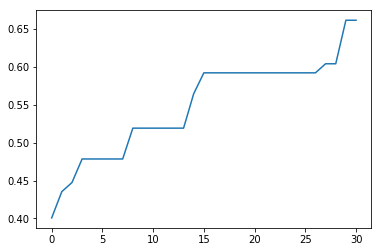

In [57]:
ntimes = len(ga.best_fitness_evol)

plt.plot(range(ntimes), ga.best_fitness_evol)

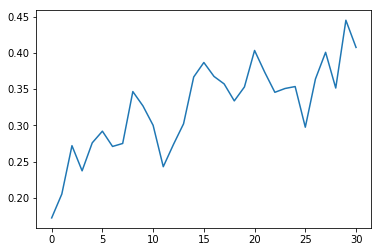

In [58]:
plt.plot(range(ntimes), ga.mean_fitness_evol)

# Testing Naive-Bayes

In [45]:
NB = Clasificador.ClasificadorNaiveBayes(laplace=True)
cross_val = EstrategiaParticionado.ValidacionCruzada(k_fold=5)

errores = clasificador.validacion(cross_val, db_titanic, NB)

print(errores)
print(np.mean(errores))

[0.22009569377990434, 0.24880382775119614, 0.2440191387559809, 0.1866028708133971, 0.20574162679425834]
0.22105263157894733


# Testing AlgoritmoGenetico tic-tac-toe

In [59]:
db_ttt = Datos('../ConjuntosDatos/tic-tac-toe.data')
n,m = db_ttt.datos.shape
print("Numero de ejemplos:", n,"| Numero de columnas:", m)

ttt_dataenc = Datos.encodeDatos(db_ttt.datos)
n,m = ttt_dataenc.shape
print("Numero de ejemplos:", n,"| Numero de columnas (ENCODE):", m)

Numero de ejemplos: 958 | Numero de columnas: 10
Numero de ejemplos: 958 | Numero de columnas (ENCODE): 28


In [60]:
strat_simple = EstrategiaParticionado.ValidacionSimple(0.8)

np.random.shuffle(ttt_dataenc)
strat_simple.creaParticiones(ttt_dataenc, None)

datostrain = ttt_dataenc[strat_simple.particiones[0].indicesTrain, :]
datostest = ttt_dataenc[strat_simple.particiones[0].indicesTest, :]

print(datostrain[:5, :])

[[0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0]
 [1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1]
 [0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1]
 [0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1]]


In [61]:
ga = Clasificador.AlgoritmoGenetico(
        n_population=20,
        max_rules=7,
        nepochs=30,
        cross_prob=0.7,
        bitflip_prob=1/20,
        add_rule_prob=0.3,
        elite_perc=0.05
)

In [62]:
ga.entrenamiento(datostrain, db_ttt.nominalAtributos, db_ttt.diccionario)

In [69]:
print(ga.best_solution)

[[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0], [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1]]


In [64]:
pred = ga.clasifica(datostest, db_ttt.nominalAtributos, db_ttt.diccionario)

In [65]:
clasificador.error(pred, datostest[:,-1])

0.47916666666666663

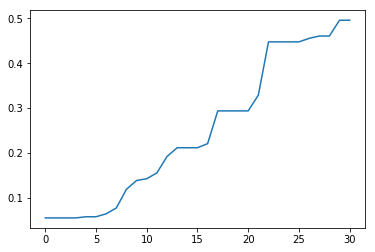

In [66]:
ntimes = len(ga.best_fitness_evol)

plt.plot(range(ntimes), ga.best_fitness_evol)

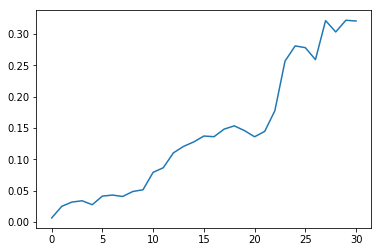

In [67]:
plt.plot(range(ntimes), ga.mean_fitness_evol)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages')

In [3]:
# My modules
from Datos import Datos
import EstrategiaParticionado
import Clasificador

# External modules
import numpy as np
import random
import pickle
import time
import matplotlib.pyplot as plt

# Important to pre-install tabulate (pip install tabulate)
from tabulate import tabulate

# Init class Classifier
clasificador = Clasificador.Clasificador()

# <font color='red'>0. Cambios en Datos.py </font>

Se han realizado algunos cambios en la clase Datos para adaptarla a las necesidades de esta práctica. Para ser más concretos, se ha añadido un nuevo parámetro al constructor **col_custom_dtypes** y un nuevo método (estático) **encodeDatos(datos)**.

## <font color='blue'> 0.1 Nueva opción de lectura: parámetro col_custom_dtypes </font>

El constructor de la clase Datos ahora recibe un nuevo parámetro opcional, **col_custom_dtypes**, que por defecto es None, pero que si se requiere es pasado a la función de lectura *read_csv* de la librería Pandas. Este parámetro es un diccionario, donde la clave es el nombre de un atributo del fichero de datos ('Pclass' del fichero titanic.data) y el valor es el tipo que será asignado a ese atributo.

Para mayor información, uno puede analizar la documentación de la propia librería Pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), en especial el argumento **dtype**.

En las anteriores prácticas considerabamos que el tipo del atributo 'class' era **siempre nominal por defecto**. Gracias a este cambio, ahora podemos trabajar con **clases continuas** e indicar que la clase es nominal **solo** cuando lo deseemos simplemente usando el parámetro **col_custom_dtypes={'class':str}**.

En la práctica que nos ocupa, como queremos cosiderar todos los atributos como nominales el parámetro col_custom_dtypes será **col_custom_dtypes={'Pclass':str, 'Age':str, 'class':str}** (la clase 'Sex' ya es nominal por defecto).

## <font color='blue'> 0.2 Método estático encodeDatos(datos) </font>

En las práctica 1 ya habíamos necesitado utilizar la codificación One-Hot de los datos para ejecutar Naive-Bayes con la librería SKLearn. En esta práctica vamos a necesitar transformar el conjunto de datos a una codificación únicamente binaria, por lo que necesitaremos de nuevo la codificación One-Hot.

Debido a que será regular usar esta codificación, la función de transformación de datos se ha incorporado a la clase Datos. Como esta función (a partir de ahora método) no depende de la instancia de Datos con la que estemos trabajando, lo implementaremos como un método estático.

**encodeDatos(datos)** recibe un numpy array de tamaño (no. de atributos + 1(clase) ) x (número de ejemplos) y devuelve otro numpy array bidimensional de tamaño k x (número de ejemplos), donde k depende de la cantidad de valores diferentes de los atributos.

Como en esta práctica trabajaremos completamente con el conjunto de datos codificado, la mejor forma de usar este método será:
~~~
db_titanic = Datos('../ConjuntosDatos/titanic.data', col_custom_dtypes={'Pclass':str, 'Age':str, 'class':str})
db_titanic.datos = Datos.encodeDatos(db_titanic.datos)
~~~

# <font color='red'>1. Detalles de la implementación </font>

Lo primero, vamos a exponer los posibles parámetros del constructor de la clase AlgoritmoGenético (aunque estos comentarios también están incluidos en el código).

~~~
__init__(self, n_population=100, max_rules=5, nepochs=100, cross_prob=0.7, cross_strat='both',
         bitflip_prob=None, add_rule_prob=0.3, elite_perc=0.05, shuffle_rules=False, verbose=False)
~~~
- **n_population**: tamaño de la población, que se mantendrá fija durante todas las épocas.
- **max_rules**: número máximo de reglas de un individuo de la población.
- **nepochs**: número de épocas, es decir, número de generaciones de la evolución.
- **cross_prob**: probabilidad de cruce. Dos individuos tienen una probabilidad 'cross_prob' de cruzarse en una época dada.
- **cross_strat**: estrategia de cruce. Existen las siguientes estrategias de cruce posibles:
    - cross_strat='inter': se realiza un cruce inter-reglas, es decir, los individuos son cruzados por reglas sin romper ninguna de ellas.
    - cross_strat='intra': se realiza un cruce intra-reglas, es decir, los individuos pueden cruzarse en el medio de dos reglas (una de cada uno) en el mismo índice.
    - cross_strat='both': se realiza tanto el cruce inter-reglas como el intra-regla.
    - cross_strat='uniform': se realiza un cruce que mezcla la estrategia de cruce uniforme con la técnica de selección de descendientes conocida como 'torneo'. Se explicará más en detalle en la sección dónde se explican los cruces.
- **bitflip_prob**: probabilidad de que un bit de una regla mute. Si bitflip_flip=None, en el entrenamiento esta probabilidad es calculada para que sea igual a 1/(tamaño de las reglas) para que se mute un bit por regla *en media*.
- **add_rule_prob**: probabilidad de que se añada una regla aleatoria nueva a un individuo en el momento de la mutación. Adicionalmente, un individuo tiene también probabilidad 'add_rule_prob' de perder una regla (si tiene más de una). Finalmente, un individuo no se le añade ni se le quita ninguna regla con probabilidad 1 - 2·add_rule_prob, por lo que hemos restringido el parámetro 'add_rule_prob' a que sea menor de 0'5.
- **elite_perc**: porcentaje de elitismo, es decir, porcentaje de la población con mejor *fitness* que pasa a la siguiente época directamente. En esta práctica este parámetro será únicamente 0'05.
- **shuffle_rules**: Booleano que determina si el orden de las reglas de un individuo ha de tenerse en cuenta o no. Siendo más precisos, cuando se realiza un cruce de dos individuos, el orden de las reglas determina el conjunto de posibles descendientes si no se embaraja el conjunto de reglas de los individuos. Si 'shuffle_rules' es True, las reglas de los padres son embarajadas antes del cruce, por lo que la cantidad de hijos posibles tras el cruce es mayor.
- **verbose**: Booleano que determina si se muestra la salida del fitness medio de la población y del fitness del mejor individuo por época. Por defecto está a False.


El **ALGORITMO DE ENTRENAMIENTO** implementado está basado en el algoritmo expuesto en clase de teoría y lo podemos resumir en los siguientes pasos (para mayor nivel de detalle visitar el fichero **Clasificador.py**, que viene ampliamente comentado):
1. **Cálculo de los priores**, que nos serán útiles para la **fase de clasificación** (explicado más adelante).
2. **Cálculo de bitflip_prob** si está a None.
3. **Inicialización de la población inicial**, donde se tiene en cuenta el tamaño de la población, el tamaño fijo de cada regla, el número máximo de reglas y que puede haber reglas con todos los bits a 1 ni todos los bits 0.
4. Para **i=0 hasta nepochs**:
5. **Cálculo del *fitness* de cada individuo de la población**, guardándolo en una lista para no tener que recalcularlo en toda la época.
6. **Selección de la élite**, es decir, el 5% de individuos con mejor fitness.
7. Selección de padres: **selección proporcional a *fitness*** (ruleta) entre todos los individuos de la población, incluyendo los individuos élite. El número de padres seleccionados es ceil(0.95 · *n_population*), ya que el número de individuos seleccionados por el elitismo es floor(0.05 · *n_population*) y recordemos que al final de cada época el tamaño de la población tiene que permanecer constante.
8. Los individuos seleccionados por la ruleta (entre los cuales también pueden estar algunos de los individuos de la élite) se **cruzan siguiendo la/s estrategia/s de cruce seleccionada/s** y dependiendo de la probabilidad de cruce (*cross_prob*).
9. Los individuos resultantes del cruce **son mutados** dependiendo de la probabilidad de mutación (*bitflip_prob* y *add_rule_prob*)
10. Los individuos resultantes de la mutación son **juntados** a los individuos que fueron seleccionados por el elitismo, obteniéndose de nuevo un tamaño de población igual a *n_population* (invariante en toda la evolución).
11. Una vez se han desarrollado todas las épocas de la evolución, se **selecciona el mejor individuo** de la población (mayor *fitness*) y se guarda para su futuro uso en la clasificación de nuevos datos.

## <font color='blue'> 1.1 Generación población inicial </font>

El constructor del algoritmo 'AlgoritmoGenetico' recibe dos parámetros esenciales para la correcta generación de la población inicial: **n_population** y **max_rules**. El primero es el parámetro que indica el tamaño de la población inicial y que se mantendrá a lo largo de todas las épocas de evolución del algoritmo. El segundo indica el tamaño máximo de un individuo o solución,es decir, el número máximo de reglas de una solución. Este último parámetro es importante para evitar el sobreentrenamiento (*overfitting*) del modelo, ya que un número desorbitado de reglas produce que el algoritmo ajuste muy bien el conjunto de entrenamiento pero sea incapaz de generalizar el modelo para datos nuevos (conjunto de test). En esta práctica, se ha considerado que el número **máximo de reglas por individuo** tiene que oscilar entre **5 y 12**.

Con esto en mente, nos podemos centrar en la generación inicial del conjunto de individuos. Cada individuo es un conjunto de reglas, donde una regla es una cadena de ceros y unos que codifica una condición. El tamaño de la regla es constante, y se corresponde con el tamaño de un ejemplo del conjunto de datos **después** de ser codificado mediante *OneHotEncode* (incluyendo el bit de la clase) digamos **k bits**. Por lo tanto, para generar un nuevo individuo aleatorio, se sortea el número de reglas iniciales del individuo **entre 1 y max_rules** (incluidos) y se genera dicho número de reglas. Una regla aleatoria es una muestra de **tamaño k** de ceros y unos, es decir, **extraer k bolas** de una urna con un 1 y un 0 **con reemplazamiento**.

Como una regla donde *todos sus bits son nulos* es *inútil* debido a que **nunca se activa**, se ha incluido en la generación aleatoria de reglas que estas no puedan ser completamente nulas. Análogamente, una regla donde *todos sus bits son 1* es contraproducente, ya que **siempre se activa**, por lo que se ha añadido la condición de que una nueva regla aleatoria no pueda tener todo bits 1.

## <font color='blue'> 1.2 Mecanismo de cruce implementado </font>

Se han implementado varios operadores de cruce para hacer la evolución de la población lo más heterogénea posible. En total se han implementado 3 operadores de cruce diferentes (que se ampliarán a 6 más adelante), lo cuales los explicamos a continuación.

Los dos primeros son los más básicos (y en principio obligatorios): cruce inter-regla y cruce intra-regla:
- El **cruce inter-regla** se basa en mezclar reglas enteras de los progenitores para generar los descendientes. Se escoge un índice (idx1) aleatoriamente entre [0, L1), siendo L1 la longitud (:= número de reglas) del progenitor 1, y otro (idx2) entre [0, L2), con L2 = número de reglas del progenitor 2. El primer descendiente tendrá todas las reglas del progenitor 1 hasta el índice idx1 y todas las reglas del progenitor 2 desde idx2 hasta la última. Análogamente, el descendiente 2 tendrá todas las reglas del progenitor 2 hasta idx2 y todas las reglas del progenitor 1 desde idx1 hasta la última regla.
- El **cruce intra-regla** es una generalización del cruce inter-regla. Ahora no se 'cortan' reglas enteras, sino que el punto de cruce puede estar en el medio de una regla y los descendientes tendrán parte de esa regla de un progenitor y la otra parte del segundo. De forma más precisa, se escogen los índices idx1, idx2 en [0, L1) y [0, L2) respectivamente igual que antes, pero ahora se escoge un **punto de cruce intra-regla (pc)** en [1,LR-1), siendo LR la longitud de cada una de las reglas (que recordemos es fija). El primer descendiente tendrá todas las reglas del progenitor 1 desde la primera hasta la de índice idx1 (no incluida), la siguiente regla serán los primeros pc bits de la regla idx1 y los últimos LR-pc bits de la regla idx2 del progenitor 2, y finalmente las ultimas reglas del progenitor 2 desde idx2 hasta la última. Análogamente, el descendiente 2 serán las primeras reglas del progenitor 2 hasta idx2 (no incluida), la siguiente regla es la formada por los primeros pc bits de la regla idx2 y los últimos LR-pc bits de la regla idx1 del padre 1, finalmente se le añadirán las reglas finales del progenitor 1, desde idx1 hasta el final.

El siguiente operador de cruce implementado es uno ideado por nosotros mismos, que **mezcla** la técnica del **cruce uniforme** con **selección por torneo**. Este cruce surge de nuestras ganas por incorporar el cruce uniforme a nuestro modelo, pero la posibilidad de que los individuos tengan un número diferente de reglas nos lo impedía. Para subsanar este incoveniente, lo que hemos hecho es truncar el progenitor de mayor longitud para que los dos progenitores tengan el mismo número de reglas. Las reglas truncadas formarán lo que denominaremos 'descendiente 3' o 'hijo 3'. Por tanto, ahora los dos progenitores tienen el mismo número de reglas y realizamos sobre ellos el conocido **cruce uniforme**: cada bit de cada regla tiene una probabilidad del 50% de pertenecer al descendiente 1 y un 50% de posibilidades de acabar en el descendiente 2. Una vez tenemos los tres descendientes (los dos primeros procedientes del cruce uniforme y el tercero formado por la truncación de reglas del individuo mayor), **debemos seleccionar 2** de ellos para pasar a la siguiente fase evolutiva, ya que una de las premisas es que el tamaño de la población **no puede variar** a lo largo de las épocas. Para escoger los dos individuos que sobrevirán hemos decidido utilizar la técnica conocida como **'selección por torneo'**, con la que ya habíamos tratado en las prácticas de la asignatura Análisis y Diseño de Software en 2º curso. La selección por torneo básicamente escoge a los supervivientes mediante su *fitness*, es decir, se escogen para pasar a la siguiente fase los dos descendientes con mejor *fitness*.

Creemos que este operador de cruce tiene varios **puntos fuertes**:
- Primero, notemos que el número de reglas de los dos descendientes al finalizar el cruce van a tener un número de reglas **igual o menor** a la de los padres. Esto genera un **efecto de regularización** ya que los individuos con un número de reglas muy alto tienden a sobreentrenar (*overfit*) el modelo.
- Adicionalmente, este operador de cruce permite **acercanos con mayor velocidad a un mínimo de la función de coste** (error de clasificación del modelo, que se podría ver como la inversa de la función de *fitness*), ya que la selección por torneo **siempre escoge a los mejores** descendientes.

Uno de los **inconvenientes** más claros de este método de cruce es su **coste computacional**. De lejos, lo más costoso de ejecutar nuestro modelo de algoritmo genético es la evaluación de la función *fitness* ya que para cada individuo evaluado hay que pasar por todos los ejemplos de entrenamiento. Por suerte son solo tres individuos los que hay que evaluar por cruce, pero hemos **restringido** el modelo para **no poder aplicar** este método de cruce con los cruces inter e intra-regla para no sobrecargar el tiempo de ejecución.

Una de las preguntas interesantes que nos deberemos hacer a lo largo de esta práctica será **¿qué estrategia de cruce es la mejor? ¿el cruce uniforme resulta ser mejor, peor o parecido a los cruces inter e intra-regla?**. Todo esto lo veremos en las secciones futuras.

## <font color='blue'> 1.3 Mecanismo de mutación implementado </font>

Durante una época de evolución un mismo individuo puede mutarse de dos maneras diferentes no excluyentes, es decir, existen dos tipos de mutaciones y un individuo tendrá una cierta probabilidad de ser mutado por cada una de ellas, pudiendo ser mutado de ambas, de una o incluso de ninguna forma.

Las dos técnicas de mutación implementadas son:
- **Mutación por cambio de bit o *bitflip***.
- **Mutación por eliminación/adición de una regla**.

En cuanto a la **mutación por cambio de bit** o *bitflip*, deberemos tener en mente el parámetro del constructor **bitflip_prob**, que es la probabilidad de mutación de un bit de un individuo. Si **bitflip_prob=None** (por defecto), esta probabilidad es calculada en el entrenamiento para ser igual a 1/(número de bits de una regla) = 1/(tamaño de espacio de atributos codificados + 1). De esta forma se mutará 1 bit por regla **en media**. Si deseamos que se muten más bits por regla (en media) solo tendremos que indicar una probabilidad **bitflip_prob** **mayor** que 1/(número de bits por regla). Si por el contrario queremos que no muten (de nuevo, en media) los bits de algunas reglas solo tendremos que inicializar **bitflip_prob** **menor** que 1/(número de bits por regla * número medio de reglas) = 2/(número de bits por regla * número máximo de reglas).

Por otro lado, para la **mutación por eliminación/adición de una regla** deberemos tener en cuenta el parámetro **add_rule_prob**. Este parámetro es la probabilidad que tiene un individuo de recibir una regla aleatoria nueva. Adicionalmente, un individuo tiene una probabilidad **add_rule_prob** de perder una regla. En resumen, un individuo puede recibir una regla aleatoria nueva con probabilidad **add_rule_prob**, un individuo puede perder una regla (escogida aleatoriamente entre su conjunto de reglas) con probabilidad **add_rule_prob**, y finalmente un individuo puede mantenerse igual con probabilidad **1 - 2·add_rule_prob**. Por consiguiente, hemos añadido la restricción **add_rule_prob < 0.5** para que la probabilidad de los tres eventos sume 1.

**Observación importante**: cuando realizamos la mutación por eliminación/adición de una regla, tenemos en cuenta que un individuo con 1 regla **no puede perder** esa última regla; y cuando añadimos una regla nueva esta **no puede tener todos sus bits iguales a 1 o todos iguales a 0**, y un individuo con **número máximo de reglas no puede recibir** una adicional.

## <font color='blue'> 1.4 Mecanismo de clasificación implementado </font>

Al final de la fase de entrenamiento se escoge al mejor individuo de la población, es decir, la solución con mejor *fitness*. Durante la fase de clasificación se utilizará el mejor individuo obtenido en la fase de entrenamiento que codifica un conjunto de reglas.

Se dice que una regla se activa para un dato de clasificación cuando, para **cada atributo**, **alguno de sus bits está a 1** y **coincide** con el bit correspondiente de la regla. 

Cuando una regla se activa, esta predice una clase, que es el valor del k-ésimo bit (0 ó 1). Cuando se hayan comprobado entre todas las reglas cuales se activan, tendremos una lista (puede que vacía) de clases predichas, es decir, una lista de 'votos' para la clasificación de ese ejemplo. Finalmente, la clase predicha es la que recibe el mayor número de 'votos'. Es aquí donde surgen dos pequelas complicaciones: ¿qué pasa si el número de votos es igual para ambas clases?, ¿qué pasa si nunguna de las reglas se activa (lista de votos vacía)?.

Nosotros hemos considerado ambas casuísticas de diferente forma: si ninguna regla se activa (la lista de 'votos' está vacía) la función de clasificación devuelve **-1** para ese dato, y por consiguiente la función de cálculo de error va a considerar dicho ejemplo como **mal** clasificado **siempre**. Por otro lado, si el número de votos es idéntico, la clase predicha será **la clase con mayor probabilidad *a priori*, la cual habrá sido calculada en la fase de entrenamiento**, utilizando **únicamente** los datos de entrenamiento para **no generar sesgos** en la fase de clasificación.

# <font color='red'>2. Clasificación usando el modelo AlgoritmoGenetico </font>

## <font color='blue'> 2.1 Conjunto de datos titanic </font>

In [4]:
db_titanic = Datos('../ConjuntosDatos/titanic.data', col_custom_dtypes={'Pclass':str, 'Age':str, 'class':str})
n,m = db_titanic.datos.shape
print("Numero de ejemplos:", n,"| Numero de columnas:", m)

db_titanic.datos = Datos.encodeDatos(db_titanic.datos)
n,m = db_titanic.datos.shape
print("Numero de ejemplos:", n,"| Numero de columnas despues de codificacion:", m)

Numero de ejemplos: 1046 | Numero de columnas: 4
Numero de ejemplos: 1046 | Numero de columnas despues de codificacion: 22


In [5]:
cross_strat = EstrategiaParticionado.ValidacionCruzada(k_fold=5)

### 2.1.1 Ejercución con *verbose*: *feedback* por época

Uno de los requisitos del enunciado de la práctica es que "es importante mostrar mensajes aclarativos durante la salida del programa, pero solo es necesario indicar en cada generación el fitness del mejor individuo y el fitness medio de la población". Para ello hemos incorporado el argumento ***verbose*** en el constructor del clasificador para poder discernir si queremos o no mostrar mensajes del estado de la ejecución durante el proceso de entrenamiento. A continuación mostramos un ejemplo de como sería ese *feedback* época tras época. Como bien se dice, solo se muestra en *fitness* medio de la población y el mejor *fitness* de esa época.

Por lo general, utilizar la función *print* es muy costoso computacionalmente, así que en el resto del *notebook* la opción ***verbose*** estará a **False**, ya que el modelo ya es bastante lento por sí solo.

En cualquier caso, recordemos que el clasificador **guarda en dos atributos** (lista) públicos la **lista de *fitness* medios** y **mejores *fitness* por época**, y que la podremos utilizar para representar la evolución al final de la ejecución.

In [13]:
ga = Clasificador.AlgoritmoGenetico(
        n_population=50,
        max_rules=7,
        nepochs=50,
        cross_prob=0.7,
        cross_strat='uniform',
        bitflip_prob=None,
        add_rule_prob=0.3,
        elite_perc=0.05,
        shuffle_rules=True,
        verbose=True
)

In [14]:
errores = clasificador.validacion(cross_strat, db_titanic, ga)

EPOCH NUMBER 1
	Mean population fitness: 0.21488649940262847
	Best individual fitness: 0.43727598566308246
EPOCH NUMBER 2
	Mean population fitness: 0.27524492234169656
	Best individual fitness: 0.4934289127837515
EPOCH NUMBER 3
	Mean population fitness: 0.27572281959378736
	Best individual fitness: 0.5555555555555556
EPOCH NUMBER 4
	Mean population fitness: 0.2829151732377539
	Best individual fitness: 0.5555555555555556
EPOCH NUMBER 5
	Mean population fitness: 0.30224611708482674
	Best individual fitness: 0.5555555555555556
EPOCH NUMBER 6
	Mean population fitness: 0.26776583034647555
	Best individual fitness: 0.5555555555555556
EPOCH NUMBER 7
	Mean population fitness: 0.3221744324970131
	Best individual fitness: 0.5555555555555556
EPOCH NUMBER 8
	Mean population fitness: 0.32862604540023893
	Best individual fitness: 0.5913978494623656
EPOCH NUMBER 9
	Mean population fitness: 0.31918757467144565
	Best individual fitness: 0.5913978494623656
EPOCH NUMBER 10
	Mean population fitness: 0.307

EPOCH NUMBER 28
	Mean population fitness: 0.4315651135005974
	Best individual fitness: 0.7586618876941458
EPOCH NUMBER 29
	Mean population fitness: 0.4260095579450418
	Best individual fitness: 0.7586618876941458
EPOCH NUMBER 30
	Mean population fitness: 0.4331780167264039
	Best individual fitness: 0.7586618876941458
EPOCH NUMBER 31
	Mean population fitness: 0.4286977299880526
	Best individual fitness: 0.7586618876941458
EPOCH NUMBER 32
	Mean population fitness: 0.41918757467144574
	Best individual fitness: 0.7586618876941458
EPOCH NUMBER 33
	Mean population fitness: 0.40507765830346476
	Best individual fitness: 0.7586618876941458
EPOCH NUMBER 34
	Mean population fitness: 0.4579569892473118
	Best individual fitness: 0.7586618876941458
EPOCH NUMBER 35
	Mean population fitness: 0.4660095579450418
	Best individual fitness: 0.7622461170848268
EPOCH NUMBER 36
	Mean population fitness: 0.44469534050179216
	Best individual fitness: 0.7622461170848268
EPOCH NUMBER 37
	Mean population fitness: 0

EPOCH NUMBER 5
	Mean population fitness: 0.43649940262843484
	Best individual fitness: 0.7837514934289128
EPOCH NUMBER 6
	Mean population fitness: 0.43743727598566307
	Best individual fitness: 0.7837514934289128
EPOCH NUMBER 7
	Mean population fitness: 0.46997610513739546
	Best individual fitness: 0.7837514934289128
EPOCH NUMBER 8
	Mean population fitness: 0.44534647550776585
	Best individual fitness: 0.7861409796893668
EPOCH NUMBER 9
	Mean population fitness: 0.4333094384707287
	Best individual fitness: 0.7861409796893668
EPOCH NUMBER 10
	Mean population fitness: 0.428321385902031
	Best individual fitness: 0.7861409796893668
EPOCH NUMBER 11
	Mean population fitness: 0.4571744324970131
	Best individual fitness: 0.7861409796893668
EPOCH NUMBER 12
	Mean population fitness: 0.46068100358422936
	Best individual fitness: 0.7861409796893668
EPOCH NUMBER 13
	Mean population fitness: 0.47318996415770603
	Best individual fitness: 0.7861409796893668
EPOCH NUMBER 14
	Mean population fitness: 0.48

EPOCH NUMBER 32
	Mean population fitness: 0.4565017921146953
	Best individual fitness: 0.7753882915173238
EPOCH NUMBER 33
	Mean population fitness: 0.451584229390681
	Best individual fitness: 0.7753882915173238
EPOCH NUMBER 34
	Mean population fitness: 0.44909916367980884
	Best individual fitness: 0.7753882915173238
EPOCH NUMBER 35
	Mean population fitness: 0.46282437275985666
	Best individual fitness: 0.7753882915173238
EPOCH NUMBER 36
	Mean population fitness: 0.4475937873357228
	Best individual fitness: 0.7753882915173238
EPOCH NUMBER 37
	Mean population fitness: 0.4434026284348865
	Best individual fitness: 0.7753882915173238
EPOCH NUMBER 38
	Mean population fitness: 0.4365686977299881
	Best individual fitness: 0.7753882915173238
EPOCH NUMBER 39
	Mean population fitness: 0.42802389486260456
	Best individual fitness: 0.7753882915173238
EPOCH NUMBER 40
	Mean population fitness: 0.4346140979689367
	Best individual fitness: 0.7753882915173238
EPOCH NUMBER 41
	Mean population fitness: 0.

In [15]:
print('Error', np.mean(errores), '+-', np.std(errores))

Error 0.2325358851674641 +- 0.016183286627069648


### 2.1.2 Analizamos si merece la pena embarajar las reglas de los individuos

In [12]:
start_t = time.time()

results_shuffle = []

mr = 7
cp = 0.5
arp = 0.3
cross_strat_list = ['both', 'uniform']
for cs in cross_strat_list:
    for sr in [True, False]:
        ga = Clasificador.AlgoritmoGenetico(
                n_population=50,
                max_rules=mr,
                nepochs=50,
                cross_prob=cp,
                cross_strat=cs,
                bitflip_prob=None,
                add_rule_prob=arp,
                elite_perc=0.05,
                shuffle_rules=sr,
                verbose=False
            )
        errores = clasificador.validacion(cross_strat, db_titanic, ga)
        mean_err = np.mean(errores)
        std_err = np.std(errores)
        results_shuffle.append((cs, sr, mean_err, std_err))
        print('===================')
        print('Estrategia de cruce:', cs)
        print('Reglas sin orden definido:', sr)
        print('Error cometido:', mean_err, '+-', std_err)

end_t = time.time()
print('Tiempo transcurrido (en minutos):', (end_t-start_t)/60)

Estrategia de cruce: both
Reglas sin orden definido: True
Error cometido: 0.21148325358851677 +- 0.02645028700686172
Estrategia de cruce: both
Reglas sin orden definido: False
Error cometido: 0.26794258373205737 +- 0.07250027531052942
Estrategia de cruce: uniform
Reglas sin orden definido: True
Error cometido: 0.23636363636363633 +- 0.041557991867193236
Estrategia de cruce: uniform
Reglas sin orden definido: False
Error cometido: 0.2354066985645933 +- 0.04075701328047249
Tiempo transcurrido (en minutos): 186.59568728605907


In [10]:
store_file = 'results_shuffle_persistence.obj'

In [13]:
with open(store_file, 'wb') as f:
    pickle.dump(results_shuffle, f)

In [13]:
with open(store_file, 'rb') as f:
    results = pickle.load(f)
print(results)

[('both', True, 0.21148325358851677, 0.02645028700686172), ('both', False, 0.26794258373205737, 0.07250027531052942), ('uniform', True, 0.23636363636363633, 0.041557991867193236), ('uniform', False, 0.2354066985645933, 0.04075701328047249)]


En este estudio queríamos comprobar si barajar las reglas de cada individuo previo al cruce implica una mejora de rendimiento. Para ello hemos usado dos estrategias de cruce distintas. En primer lugar usamos la estrategia 'both' que aplica cruce inter-regla y posteriormente el intra-regla. Vemos como barajar las reglas en la estrategia 'both' conlleva una mejora sustancial en el error cometido, pasando de un 0.26 a un 0.21. Sin embargo en la estrategia 'uniform' creada por nosotros parece que no llega a afectar mucho ya que dan dos errores muy parecidos. Pensamos que esto es debido a que la "fortaleza" de esta estrategia reside precisamente en la selección por torneo de 2 hijos entre 3 posibles. Por tanto el añadir una componente aleatoria más no ayuda a la convergencia del algoritmo. Por tanto a partir de ahora la estrategia que 

### 2.1.3 Análisis de hiperparámetros (no se aconseja reejecutar las siguientes celdas)

In [11]:
max_rules_list = [5, 7, 10]
cross_prob_list = [0.3, 0.5, 0.7]
cross_strat_list = ['inter', 'intra', 'uniform']
add_rule_prob_list = [0.1, 0.3]

In [13]:
start_t = time.time()

results_list = []
for mr in max_rules_list:
    for cp in cross_prob_list:
        for cs in cross_strat_list:
            for arp in add_rule_prob_list:
                ga = Clasificador.AlgoritmoGenetico(
                        n_population=50,
                        max_rules=mr,
                        nepochs=70,
                        cross_prob=cp,
                        cross_strat=cs,
                        bitflip_prob=None,
                        add_rule_prob=arp,
                        elite_perc=0.05,
                        shuffle_rules=True,
                        verbose=False
                    )
                errores = clasificador.validacion(cross_strat, db_titanic, ga)
                mean_err = np.mean(errores)
                std_err = np.std(errores)
                results_list.append((mr, cp, cs, arp, mean_err, std_err))
                print('===================')
                print('Numero maximo de reglas:', mr)
                print('Probabilidad de cruce:', cp)
                print('Estrategia de cruce:', cs)
                print('Probabilidad de añadir/quitar una regla:', arp)
                print('Error cometido:', mean_err, '+-', std_err)

end_t = time.time()
print('Tiempo transcurrido (en minutos):', (end_t-start_t)/60)


Numero maximo de reglas: 5
Probabilidad de cruce: 0.3
Estrategia de cruce: inter
Probabilidad de añadir/quitar una regla: 0.1
Error cometido: 0.26220095693779905 +- 0.06909859597525626
Numero maximo de reglas: 5
Probabilidad de cruce: 0.3
Estrategia de cruce: inter
Probabilidad de añadir/quitar una regla: 0.3
Error cometido: 0.3253588516746412 +- 0.09583721307984137
Numero maximo de reglas: 5
Probabilidad de cruce: 0.3
Estrategia de cruce: intra
Probabilidad de añadir/quitar una regla: 0.1
Error cometido: 0.2535885167464115 +- 0.03606017929457755
Numero maximo de reglas: 5
Probabilidad de cruce: 0.3
Estrategia de cruce: intra
Probabilidad de añadir/quitar una regla: 0.3
Error cometido: 0.25167464114832533 +- 0.058019163219996644
Numero maximo de reglas: 5
Probabilidad de cruce: 0.3
Estrategia de cruce: uniform
Probabilidad de añadir/quitar una regla: 0.1
Error cometido: 0.2803827751196172 +- 0.1011642127188709
Numero maximo de reglas: 5
Probabilidad de cruce: 0.3
Estrategia de cruce: u

Como podemos ver en la última línea del *feedback* de ejecución, el tiempo necesario de cómputo para analizar todos los anteriores hiperparámetros (11 en total) ha sido de **~3410 minutos**, es decir, **casi 57 horas**. La verdad que es nosotros pensábamos que iba a tardar 1 día o un 1 día y medio, pero debimos haber hecho una estimación más precisa.

Como no podemos permitirnos reejecutar la celda anterior para volver a conseguir todos estos datos de rendimiento, vamos a guardarlos en un fichero para cargarlos cuando lo necesitemos. Esto es una práctica común en el mundo del aprendizaje automático: los tiempos de entrenamiento pueden ser muy grandes y los resultados se guardan en memoria para no tener que volver a entrenar el modelo (cosa que pasábamos por alto en las prácticas anteriores).


In [14]:
with open('results_list_persistence.obj', 'wb') as f:
    pickle.dump(results_list, f)

Hemos ejecutado con validación cruzada la evolución de 50 individuos a lo largo de 70 épocas para cada uno de los conjuntos de hiperparámetros. A continuación, **estudiaremos qué hiperparámetros son los que mejor rendimiento aportan para realizar las ejecuciones del algoritmo genético finales**: 50 y 150 individuos; 100 y 200 ejecuciones. Ahora sabemos de nuestra propia mano que el modelo es tremendamente costoso de entrenar, por lo que trataremos ahora de **escoger los mejores hiperparámetros para solo tener que realizar 1 validación** con el número de individuos y épocas anteriores.

In [8]:
with open('results_list_persistence.obj', 'rb') as f:
    results = pickle.load(f)

In [10]:
L1 = []
for result in results:
    L1.append(result[4])
L1.sort()

nstrat = 10
print("\n------------------------- BEST %d STRATs -------------------------\n" % nstrat)
for i in range(nstrat):
    for result in results:
        if(result[4] == L1[i]):
            print(result)
    
    
print("\nBest Value: %.3f" % min(L1)) 
print("Worst Value: %.3f" % max(L1)) 



------------------------- BEST 10 STRATs -------------------------

(10, 0.5, 'intra', 0.1, 0.21244019138755982, 0.033642862834922405)
(10, 0.7, 'intra', 0.3, 0.21531100478468898, 0.016848628575750254)
(7, 0.3, 'inter', 0.1, 0.21626794258373208, 0.019470803779306996)
(5, 0.7, 'intra', 0.3, 0.21722488038277515, 0.035497104288978766)
(7, 0.7, 'intra', 0.1, 0.21818181818181817, 0.030502157800017686)
(10, 0.5, 'inter', 0.1, 0.21818181818181817, 0.02524575303018738)
(7, 0.7, 'intra', 0.1, 0.21818181818181817, 0.030502157800017686)
(10, 0.5, 'inter', 0.1, 0.21818181818181817, 0.02524575303018738)
(5, 0.5, 'uniform', 0.1, 0.21913875598086124, 0.03250772775399625)
(10, 0.7, 'intra', 0.1, 0.21913875598086124, 0.040757013280472466)
(5, 0.5, 'uniform', 0.1, 0.21913875598086124, 0.03250772775399625)
(10, 0.7, 'intra', 0.1, 0.21913875598086124, 0.040757013280472466)
(10, 0.7, 'inter', 0.1, 0.2200956937799043, 0.031593443098984056)
(7, 0.3, 'inter', 0.3, 0.22009569377990434, 0.03342440037621624)

B

Ahora vamos ver que configuraciones de hiperparámetros hacen que el algoritmo tenga menor tasa de error. Primero observemos que todas las tasas de error oscilan entre 0.21 y 0.34 aproximadamente. Hemos escrito un pequeño trozo de código que nos busque las **N** mejores configuraciones y ver que vemos en común de todas ellas. 

Lo primero fue ejecutar dicho código con N = 3, para ver las 3 mejores combinaciones. Se puede observar una preferencia por un alto número de reglas máximas, las dos primeras tienen 10 y la tercera 7. Esto es natural ya que al permitir que los individuos tengan más reglas van a ajustar mucho mejor los datos, aunque peligramos sobreentrenar el modelo. Con N = 3 también vemos como la estrategia 'intra' está en las 2 primeras por tanto es mejor que 'inter' lo cual ya sospechábamos porque la una es una generalización de la otra. Sin embargo, la probabilidad de cruce y la probabilidad de añadir/quitar una regla son parámetros con los que aún tenemos dudas. 

Para tomar un poco más de perspectiva vamos a ver las 15 primeras combinaciones. Primero observamos que los valores que más se repiten como probabilidad de cruce son el 0.5 y 0.7, por lo que inferimos que el mejor valor para este problema estaría cerca estos dos, por ejemplo vamos a **elegir probabilidad de cruce igual a 0.6**. Adicionalmente, la probabilidad de añadir/quitar una regla es un hiperparámetro con buenos resultados tanto para el valor 0.1 como para 0.3, aunque este último aparece en menos ocasiones, por lo que entrenaremos las versiones finales de nuestro modelo con una **probabilidad de ejecutar esta mutación igual a 0.25**. 

En cuanto a las **estrategias de cruce** vemos algo muy curioso, en medio de la lista, en los puestos 9, 11 hay una combinación de hiperparámetros que incluyen la estrategia uniforme. Esta combinación está en un puesto bastante alto del ranking y "desentona" dentro del mismo porque la tendencia de los puestos altos es a tener un alto número máximo de reglas de 10 y esta tiene 5, el mínimo. Creemos que esto es debido a que la estrategia "uniforme" hace un uso mucho más eficiente de las reglas mediante el torneo,por tanto no necesita menor número de reglas máximo y otorga un efecto de regularización adicional.

En conclusión, creemos que los mejores hiperparámetros para este conjunto de datos son:
- **Número máximo de reglas: 10**
- **Probabilidad de cruce: 0.6**
- **Estrategia de cruce: 'both'**, es decir, tanto cruce inter-regla como intra-regla.
- **Probabilidad de mutación mediante adición/eliminación de regla: 0.25**, es decir, la prob. de añadir una nueva regla a un individuo será del 25%, la prob. de eliminar una regla de un individuo será del 25% y la probabilidad de que se mantenga igual será del 50% (1-0.25-0.25).

Por otro lado, añadir que no dejaría de ser interesante probar con la **estrategia uniforme, junto con 5 reglas por individuo de máximo y probabilidad de cruce=0.6 y prob. de añadir/quitar una regla del 0.25%**. Estos hiperparámetros otorgarían un rendimiento muy similar a la anterior con la mitad de reglas, lo cual tendría una ventaja en cuanto al coste computacional y además evitamos obtener individuos demasiado sobreajustados.

A continuación, ejecutamos el algoritmo con los hiperparámetros solicitados: 50 y 150 individuos; 100 y 200 épocas. Ahora sabemos de nuestra propia mano que el modelo es tremendamente costoso de entrenar, por lo que guardaremos los resultados y clasificadores entrenados en un diccionario.

In [6]:
results_dict = {}

In [7]:
start_t = time.time()

for n_pop in [50, 150]:
    for n_ep in [100, 200]:
        ga = Clasificador.AlgoritmoGenetico(
                n_population=n_pop,
                max_rules=10,
                nepochs=n_ep,
                cross_prob=0.6,
                cross_strat='both',
                bitflip_prob=None,
                add_rule_prob=0.25,
                elite_perc=0.05,
                shuffle_rules=True,
                verbose=False
            )
        errores = clasificador.validacion(cross_strat, db_titanic, ga)
        mean_err = np.mean(errores)
        std_err = np.std(errores)
        results_dict['clfGA_titanic_both_pop'+str(n_pop)+'_epoc'+str(n_ep)] = [ga, mean_err, std_err]
        print('===================')
        print('Numero de individuos:', n_pop)
        print('Numero de epocas', n_ep)
        print('Error cometido:', mean_err, '+-', std_err)

end_t = time.time()
print('\n==>Tiempo transcurrido (en horas):', (end_t-start_t)/(60*60))

Numero de individuos: 50
Numero de epocas 100
Error cometido: 0.21244019138755982 +- 0.012329281078205844
Numero de individuos: 50
Numero de epocas 200
Error cometido: 0.23253588516746407 +- 0.008874276072244698
Numero de individuos: 150
Numero de epocas 100
Error cometido: 0.20669856459330144 +- 0.015251078900008824
Numero de individuos: 150
Numero de epocas 200
Error cometido: 0.21818181818181817 +- 0.034048702152453945

==>Tiempo transcurrido (en horas): 21.036291899151273


Antes de comentar los resultados, guardamos todo en un fichero.

In [8]:
with open('titanic_results_dict_persistence.obj', 'wb') as f:
    pickle.dump(results_dict, f)

In [65]:
with open('titanic_results_dict_persistence.obj', 'rb') as f:
    results_dict = pickle.load(f)

In [66]:
print(results_dict)

{'clfGA_titanic_both_pop50_epoc100': [<Clasificador.AlgoritmoGenetico object at 0x10f9a02b0>, 0.21244019138755982, 0.012329281078205844], 'clfGA_titanic_both_pop50_epoc200': [<Clasificador.AlgoritmoGenetico object at 0x1a253def60>, 0.23253588516746407, 0.008874276072244698], 'clfGA_titanic_both_pop150_epoc100': [<Clasificador.AlgoritmoGenetico object at 0x1a25964d68>, 0.20669856459330144, 0.015251078900008824], 'clfGA_titanic_both_pop150_epoc200': [<Clasificador.AlgoritmoGenetico object at 0x10fa24550>, 0.21818181818181817, 0.034048702152453945]}


In [67]:
start_t = time.time()

for n_pop in [50, 150]:
    for n_ep in [100, 200]:
        ga = Clasificador.AlgoritmoGenetico(
                n_population=n_pop,
                max_rules=5,
                nepochs=n_ep,
                cross_prob=0.6,
                cross_strat='uniform',
                bitflip_prob=None,
                add_rule_prob=0.25,
                elite_perc=0.05,
                shuffle_rules=True,
                verbose=False
            )
        errores = clasificador.validacion(cross_strat, db_titanic, ga)
        mean_err = np.mean(errores)
        std_err = np.std(errores)
        results_dict['clfGA_titanic_unif_pop'+str(n_pop)+'_epoc'+str(n_ep)] = [ga, mean_err, std_err]
        print('===================')
        print('Numero de individuos:', n_pop)
        print('Numero de epocas', n_ep)
        print('Error cometido:', mean_err, '+-', std_err)

end_t = time.time()
print('\n==>Tiempo transcurrido (en horas):', (end_t-start_t)/(60*60))

Numero de individuos: 50
Numero de epocas 100
Error cometido: 0.23253588516746415 +- 0.049224195787987333
Numero de individuos: 50
Numero de epocas 200
Error cometido: 0.22966507177033493 +- 0.03396792219961504
Numero de individuos: 150
Numero de epocas 100
Error cometido: 0.22392344497607658 +- 0.027964859705650633
Numero de individuos: 150
Numero de epocas 200
Error cometido: 0.22105263157894733 +- 0.03334210792379778

==>Tiempo transcurrido (en horas): 18.173587351110246


In [68]:
with open('titanic_results_dict_persistence.obj', 'wb') as f:
    pickle.dump(results_dict, f)

In [6]:
with open('titanic_results_dict_persistence.obj', 'rb') as f:
    titanic_results_dict = pickle.load(f)

Podemos ver que el error más bajo se ha obtenido con una población de 150 individuos y un número de épocas igual a 100. El error medio cometido es del 20%, una marca bastante buena ya que nos dice que tenemos un 80% de precisión de clasificación.

El clasificador entrenado también con 150 individuos pero con el doble de épocas, 200, ha tenido un error ligeramente superior, entorno al 21%. Si observamos los cuatro modelos anteriores, junto con los mejores obtenidos en la sección 2.1.3 (selección de hiperparámetros), que tenían un error similar con 70 épocas, podemos sostener que el número de épocas es un parámetro poco relevante a partir de las 70 épocas, donde parece que el modelo ha convergido a un buen resultado. Si quisiésemos obtener una precisión aún mayor deberíamos entrenar el clasificador un número de épocas desmesurado, inviable para los propósitos de esta práctica.

Adicionalmente, podemos ver que un número de individuos mayor ayuda, pero no excesivamente. Tanto en la sección 2.1.3, que se había ejecutado con una población de 50 individuos, como en esta, vemos que el cambio de 50 a 150 individuos solo produce una mejora de un 2% (en media) de error. De nuevo, si deseásemos aumentar la precisión de clasificación del modelo, deberíamos analizar qué ocurre si aumentamos el tamaño poblacional a 300 o incluso 500, donde la 'diversidad genética' podría proporcionar mejores soluciones. Sería un experimento interesante para un futuro.

Para concluir este pequeño análisis de resultados, vamos a estudiar la mejor solución tras todos estos entrenamientos: la solución del clasificador entrenado con 150 individuos y 100 épocas.

In [39]:
def print_best_sol_pretty(best_sol):
    cont = 0
    for rule in best_sol:
        if rule[-1] == 0:
            print(cont, '-->', rule)
            cont += 1
    for rule in best_sol:
        if rule[-1] == 1:
            print(cont, '-->', rule)
            cont += 1

In [40]:
print('Reglas del mejor individuo:')
print_best_sol_pretty(results_dict['clfGA_titanic_both_pop150_epoc100'][0].best_solution)

Reglas del mejor individuo:
0 --> [0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
1 --> [1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0]
2 --> [1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0]
3 --> [1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0]
4 --> [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1]
5 --> [1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1]
6 --> [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1]
7 --> [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
8 --> [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1]
9 --> [1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1]


En la celda anterior hemos impreso el mejor individuo de los cuatro modelos que finalmente hemos entrenado. Recordemos que este individuo modela una solución con un 80% de precisión (~20% de error). Hemos ordenado las reglas para estudiar primero las reglas que predicen clase 0 y después las que predicen clase 1.

Empecemos recordando qué codificaba una regla para el conjunto 'titanic'. El primer atributo de este conjunto es la clase del pasajero, 'Pclass', y existen tres valores posibles (1, 2 y 3), lo que se traduce en tres posibles codificaciones con OneHotEncode (001, 010 y 100 respectivamente). El segundo atributo es el género, 'Sex', del pasajero (*male* o *female*) por lo que se codificara como 01 o 10 respectivamente. El último atributo es la edad (discretizada) del pasajero, que toma valores en 0,1,...,15. Por lo tanto, usamos 21 bits para codificar los atributos de un ejemplo de entrenamiento y otro adicional para la clase (0 o 1).

Una regla codifica una condición (tal y como se explica en el enunciado de la práctica) para predecir una cierta clase. La clase finalmente predicha es la clase mayoritaria entre el conjunto de reglas activadas.

Estudiemos las reglas del mejor individuo una a una:

- Regla índice 0:
    - Atributo 'Pclass': se activará cuando su valor sea 1, es decir, clase baja.
    - Atributo 'Sex': se activará cuando su valor sea 0 o 1, es decir, *male* o *female*.
    - Atributo 'Age': se activará cuando su valor sea 1,...9 o 14, es decir, si el pasajero tenía entre 5 y 50 años o entre 70 y 75 años.
    - Clase predicha 'class': 0, es decir, no sobrevive.
    - Interpretación de la regla: esta regla parece considerar que el pasajero no sobrevivía si era de la clase baja, ya que siempre se activa independientemente del género y casi en todos los rangos de edad (salvo bebés y muy ancianos). Esta regla considera que ser pobre "salía caro", algo razonable sabiendo que los camarotes de los pobres se posicionaban en los pisos más bajos del barco, y por consiguiente, los primeros que se hundían.

- Regla índice 1:
    - Atributo 'Pclass': se activará cuando su valor sea 1, 2 ó 3; es decir, para cualquier tipo de clase.
    - Atributo 'Sex': se activará cuando su valor sea 1, es decir, mujer.
    - Atributo 'Age': se activará cuando su valor sea 0,1,3,4,5,6,8,9,11,12,13 o 15, es decir, si el pasajero tenía una edad en los siguientes intervalos: \[0, 10], \[15, 35], \[40, 50], \[55, 70], \[75, 80]. 
    - Clase predicha 'class': 0, es decir, no sobrevive.
    - Interpretación de la regla: esta regla parece considerar que el pasajero no sobrevivía si era mujer, ya que la clase de pasajero es independiente de la activación de esta regla y las franjas de edad son grandes y heterogéneas. Si consideramos que una mujer tiene, en media, una fuerza y resistencia no aptos para sobrevivir a un naufragio en el ártico, podríamos decir que esta regla es efectiva. Sin embargo, la creencia popular piensa que los primeros que se salvaban eran los niños y las mujeres al conseguir las primeras posiciones de los barcos salvavidas. Habría que obtener los datos reales de supervivientes para realmente ver cómo de 'correcta' es la interpretación de esta regla.

- Regla índice 2:
    - Atributo 'Pclass': se activará cuando su valor sea 2 o 3, es decir, clase media o alta.
    - Atributo 'Sex': se activará cuando su valor sea 1, es decir, mujer.
    - Atributo 'Age': se activará cuando su valor sea 0,1,3,4,5,6,8,9,11,12,13 o 15, es decir, las mismas franjas de edad de la regla de índice 1 (la anterior).
    - Clase predicha 'class': 0, es decir, no sobrevive.
    - Interpretación de la regla: esta regla es un caso particular de la regla de índice 1, ya que se activará en un subconjunto (Pclass media o alta, cuando la 1 eran todas las clases) de los casos. Como analistas de datos podríamos decidir eliminar esta regla de la solución ya que es redundante y así ganar eficiencia computacional.

- Regla índice 3:
    - Atributo 'Pclass': se activará cuando su valor sea 1, 2 ó 3; es decir, para cualquier tipo de clase.
    - Atributo 'Sex': se activará cuando su valor sea 1, es decir, mujer.
    - Atributo 'Age': se activará cuando su valor sea 0,1,...,6,8,9,10,...,13 o 15, es decir, si el pasajero tenía una edad en los siguientes intervalos: \[0, 35], \[40, 45], \[50, 70], \[75, 80]. Parecido a la regla 1 y 2.
    - Clase predicha 'class': 0, es decir, no sobrevive.
    - Interpretación de la regla: esta regla parece indicar algo parecido a la regla de índice 1 y 2. Para ser más exactos es la regla 1 pero variando ligeramente los rangos de edad, que siguen abarcando casi todo el espectro. Las tres últimas reglas 'consideran' que ser mujer te daba pocas posibilidades de sobrevivir.

- Regla índice 4:
    - Atributo 'Pclass': se activará cuando su valor sea 1, 2 ó 3; es decir, para cualquier tipo de clase.
    - Atributo 'Sex': se activará cuando su valor sea 2, es decir, hombre.
    - Atributo 'Age': se activará cuando su valor sea 0,3,4,5,6,8,11,12,13 o 15, es decir, si el pasajero tenía una edad en los siguientes intervalos: \[0, 5], \[15, 35], \[40, 45], \[55, 70], \[75,80].
    - Clase predicha 'class': 1, es decir, sí sobrevive.
    - Interpretación de la regla: esta regla parece indicar que un hombre relativamente joven-adulto (entre 15 y 45 años), junto con los bebés masculinos y ancianos, tenían muchas posibilidades de sobrevivir. Puede tener sentido si consideramos que los niños y ancianos tenían preferencia por los botes y los adolescentes-adultos tenían el suficiente físico como aumentar sus posibilidades de supervivencia.

- Regla índice 5:
    - Atributo 'Pclass': se activará cuando su valor sea 1 ó 3; es decir, para clase alta o baja.
    - Atributo 'Sex': se activará cuando su valor sea 1, es decir, mujer.
    - Atributo 'Age': se activará cuando su valor sea 3,5,6 0 13, es decir, si el pasajero tenía una edad en los siguientes intervalos: \[15, 20], \[25, 35], \[65, 75].
    - Clase predicha 'class': 1, es decir, sí sobrevive.
    - Interpretación de la regla: podemos apreciar que la regla considera que ser mujer adolescente-adulta te daba altas probabilidades de sobrevivir. Existen pequeños rasgos límites como que podía ser de clase baja pero no media, y también se activa si se trataba de una anciana de 65-70 años, aunque siempre puede haber sido un bit mutado que no interfiriera negativamente al *fitness*.

- Regla índice 6:
    - Atributo 'Pclass': se activará cuando su valor sea 1, 2 ó 3; es decir, para cualquier clase.
    - Atributo 'Sex': se activará cuando su valor sea 2, es decir, hombre.
    - Atributo 'Age': se activará cuando su valor sea 0,3,4,5,6,8,11,12,13 o 15, es decir, si el pasajero tenía una edad en los siguientes intervalos: \[0, 5], \[15, 35], \[40, 45], \[55, 70], \[75,80].
    - Clase predicha 'class': 2, es decir, sí sobrevive.
    - Interpretación de la regla: analizando la regla en perspectiva, vemos que codifica la misma codición que la regla 4, es decir, es redundante dentro del conjunto de reglas del individuo. Esto nos da una gran idea para futuras mejoras de nuestro algoritmo (pero que no vamos a implementar en el transcurso de esta práctica): eliminar las reglas repetidas o que sean un subconjunto de otras (como la regla 3, que es una condición que cumple ya la regla 1) para aplicar un efecto regularizador o permitir al individuo mutar en una regla extra si está al límite del número de reglas máximo, como es el caso de este individuo.

- Regla índice 7:
    - Atributo 'Pclass': se activará cuando su valor sea 2 ó 3; es decir, clase media o alta.
    - Atributo 'Sex': se activará cuando su valor sea 2, es decir, hombre.
    - Atributo 'Age': se activará cuando su valor sea 1,...,8,10,...,12 o 14, es decir, si el pasajero tenía una edad en los siguientes intervalos: \[5, 45], \[50, 65], \[70,75].
    - Clase predicha 'class': 2, es decir, sí sobrevive.
    - Interpretación de la regla: esta regla parece indicar que un hombre, independientemente de su edad debido a la gran franja de edad que se podría activar, tendía a sobrevivir si era de clase media o alta. Algo que tiene sentido si consideramos que los pasajeros de las clases más altas tenían ciertos privilegios y, al tratarse de hombres, parece que su resistencia física también les aportaba ventajas.

- Regla índice 8:
    - Atributo 'Pclass': se activará cuando su valor sea 1, 2 ó 3; es decir, para cualquier clase.
    - Atributo 'Sex': se activará cuando su valor sea 2, es decir, hombre.
    - Atributo 'Age': se activará cuando su valor sea 0,3,4,5,6,8,11,12,13 o 15, es decir, si el pasajero tenía una edad en los siguientes intervalos: \[0, 5], \[15, 35], \[40, 45], \[55, 70], \[75,80].
    - Clase predicha 'class': 2, es decir, sí sobrevive.
    - Interpretación de la regla: es exactamente la misma regla que la regla 6 y 4. La eliminación de reglas repetidas sería una mejora a implementar que podría beneficiar al individuo, pero pensándolo detenidamente, igual es una consecuencia de la evolución: detalles imperfectos se pueden dar en la evolución de una especie pero que al final resultan ser beneficiosos. En este caso, la repetición de esta regla podría beneficiar al individuo si se diera el caso en que hubiese empate de votos de clases predichas, es decir, en un hipotético caso en que un individuo tenga dos reglas que se activen con clases diferentes, una regla adicional igual a una de esas que se activan decantaría al individuo a predecir una clase en concreto. En este caso, que las reglas 4,6 y 8 se repitan podría provocar un desempate con la regla 0, que vota a que un hombre no sobrevive en ciertas circunstancias. Para ver finalmente si esta característica evolutiva realmente es beneficiosa habría que estudiar con más tiempo y más afondo varios casos particulares.

- Regla índice 9:
    - Atributo 'Pclass': se activará cuando su valor sea 2 ó 3; es decir, clase media o alta.
    - Atributo 'Sex': se activará cuando su valor sea 1, es decir, mujer.
    - Atributo 'Age': se activará cuando su valor sea 1,3...,8,11,14 o 15, es decir, si el pasajero tenía una edad en los siguientes intervalos: \[5, 10], \[15, 45], \[55, 60], \[70,80].
    - Clase predicha 'class': 2, es decir, sí sobrevive.
    - Interpretación de la regla: La última regla parece indicar que una mujer de clase media/alta y de edad joven-adulta o anciana tendían a sobrevivir.

CONCLUSIÓN: El conjunto de reglas parece indicar lo siguiente: las clases altas tenían muchas más posibilidades de sobrevivir que las bajas. Los ancianos y bebés tienen cierta tendencia a sobrevivir, posiblemente por preferencias a la hora de asignar posiciones en los botes salvavidas. Finalmente, los hombres jóvenes-adultos tenían muchas posibilidades de sobrevivir, y una mujer de clase media/alta y relativamente adulta también. Si eras lo suficientemente adulto como para no tener un buen físico pero insuficiente para considerarte anciano, tenías muchas posibilidades de no sobrevivir.


## <font color='blue'> 2.2 Conjunto de datos tic-tac-toe </font>

In [24]:
db_ttt = Datos('../ConjuntosDatos/tic-tac-toe.data')
n,m = db_ttt.datos.shape
print("Numero de ejemplos:", n,"| Numero de columnas:", m)

db_ttt.datos = Datos.encodeDatos(db_ttt.datos)
n,m = db_ttt.datos.shape
print("Numero de ejemplos:", n,"| Numero de columnas despues de codificacion:", m)

Numero de ejemplos: 958 | Numero de columnas: 10
Numero de ejemplos: 958 | Numero de columnas despues de codificacion: 28


In [28]:
simple_strat = EstrategiaParticionado.ValidacionSimple(percentage=0.8, nreps=2)

### 2.2.1 Análisis de hiperparámetros

Generalizamos de las secciones 2.1.1 y 2.1.2 los ejemplos de los parámetros *verbose=True* y los resultados embarajando las reglas análisis que no vamos a repetir para este conjunto de entrenamiento: las reglas de los individuos se considerán independientes del orden (por lo que serán embarajadas antes de los posibles cruces) y no mostraremos el *feedback* época tras época para no saturar la salida y para reducir el coste computacional. Lógicamente sí analizaremos el *fitness* medio y el mejor *fitness* de la población una vez tengamos los resultados finales.

Estimamos que una ejecución con 50 individuos y 50 épocas, con validación simple (2 reps), necesita ~45 mins de ejecución. No vamos a probar los 11 hiperparámetros de la sección 2.1.3, sino un subconjunto de los mismos.

In [50]:
max_rules_list = [5, 10]
cross_strat_list = ['both', 'uniform']
cross_prob_list = [0.3, 0.6, 0.8]

In [51]:
start_t = time.time()

results_list = []
for mr in max_rules_list:
    for cp in cross_prob_list:
        for cs in cross_strat_list:
            ga = Clasificador.AlgoritmoGenetico(
                    n_population=50,
                    max_rules=mr,
                    nepochs=60,
                    cross_prob=cp,
                    cross_strat=cs,
                    bitflip_prob=None,
                    add_rule_prob=0.3,
                    elite_perc=0.05,
                    shuffle_rules=True,
                    verbose=False
                )
            errores = clasificador.validacion(simple_strat, db_ttt, ga)
            mean_err = np.mean(errores)
            std_err = np.std(errores)
            results_list.append((mr, cp, cs, mean_err, std_err))
            print('===================')
            print('Numero maximo de reglas:', mr)
            print('Probabilidad de cruce:', cp)
            print('Estrategia de cruce:', cs)
            print('Error cometido:', mean_err, '+-', std_err)

end_t = time.time()
print('Tiempo transcurrido (en horas):', (end_t-start_t)/(60*60))

Numero maximo de reglas: 5
Probabilidad de cruce: 0.3
Estrategia de cruce: both
Error cometido: 0.3385416666666667 +- 0.005208333333333315
Numero maximo de reglas: 5
Probabilidad de cruce: 0.3
Estrategia de cruce: uniform
Error cometido: 0.3463541666666667 +- 0.002604166666666685
Numero maximo de reglas: 5
Probabilidad de cruce: 0.6
Estrategia de cruce: both
Error cometido: 0.375 +- 0.02083333333333337
Numero maximo de reglas: 5
Probabilidad de cruce: 0.6
Estrategia de cruce: uniform
Error cometido: 0.3671875 +- 0.0234375
Numero maximo de reglas: 5
Probabilidad de cruce: 0.8
Estrategia de cruce: both
Error cometido: 0.3307291666666667 +- 0.018229166666666685
Numero maximo de reglas: 5
Probabilidad de cruce: 0.8
Estrategia de cruce: uniform
Error cometido: 0.3541666666666667 +- 0.010416666666666685
Numero maximo de reglas: 10
Probabilidad de cruce: 0.3
Estrategia de cruce: both
Error cometido: 0.41927083333333337 +- 0.10677083333333337
Numero maximo de reglas: 10
Probabilidad de cruce: 

Primero guardamos los datos por si los necesitásemos reutilizar en un futuro y así nos ahorraríamos 2.6 horas de ejecución.

In [52]:
with open('results_ttt_hyper_persistence.obj', 'wb') as f:
    pickle.dump(results_list, f)

In [54]:
with open('results_ttt_hyper_persistence.obj', 'rb') as f:
    results_list = pickle.load(f)

print(pers_list)

[(5, 0.3, 'both', 0.3385416666666667, 0.005208333333333315), (5, 0.3, 'uniform', 0.3463541666666667, 0.002604166666666685), (5, 0.6, 'both', 0.375, 0.02083333333333337), (5, 0.6, 'uniform', 0.3671875, 0.0234375), (5, 0.8, 'both', 0.3307291666666667, 0.018229166666666685), (5, 0.8, 'uniform', 0.3541666666666667, 0.010416666666666685), (10, 0.3, 'both', 0.41927083333333337, 0.10677083333333337), (10, 0.3, 'uniform', 0.3151041666666667, 0.018229166666666685), (10, 0.6, 'both', 0.40625, 0.02083333333333337), (10, 0.6, 'uniform', 0.33854166666666663, 0.03125), (10, 0.8, 'both', 0.3229166666666667, 0.036458333333333315), (10, 0.8, 'uniform', 0.3880208333333333, 0.013020833333333315)]


In [ ]:
Vamos a reordenar los anteriores resultados por menor error de clasificación, para intentar discernir los mejores hiperparámetros para entrenar los modelos finales.

In [55]:
L = []
for result in results_list:
    L.append(result[3])
L.sort()

n = 10
print("\n------------------------- BEST %d STRATs -------------------------\n" % n)
for i in range(n):
    for result in results_list:
        if(result[3] == L[i]):
            print(result)
    
    
print("\nBest Value: %.3f" % min(L)) 
print("Worst Value: %.3f" % max(L)) 


------------------------- BEST 10 STRATs -------------------------

(10, 0.3, 'uniform', 0.3151041666666667, 0.018229166666666685)
(10, 0.8, 'both', 0.3229166666666667, 0.036458333333333315)
(5, 0.8, 'both', 0.3307291666666667, 0.018229166666666685)
(10, 0.6, 'uniform', 0.33854166666666663, 0.03125)
(5, 0.3, 'both', 0.3385416666666667, 0.005208333333333315)
(5, 0.3, 'uniform', 0.3463541666666667, 0.002604166666666685)
(5, 0.8, 'uniform', 0.3541666666666667, 0.010416666666666685)
(5, 0.6, 'uniform', 0.3671875, 0.0234375)
(5, 0.6, 'both', 0.375, 0.02083333333333337)
(10, 0.8, 'uniform', 0.3880208333333333, 0.013020833333333315)

Best Value: 0.315
Worst Value: 0.419


Vemos que hemos alcanzado el mejor resultado con la estrategia 'uniforme', ideada por nosotros. No obstante, la estrategia 'both' (que usa tanto la estrategia de cruce inter-regla como la intra-regla) no se queda por detrás, ya que tiene resultados muy parecidos. 

Resumiendo, parece que para lograr (con 50 individuos y 60 épocas) un error del ~30% es válido usar tanto la estrategia 'uniform' como la 'both', con un número máximo de reglas relativamente alto (más de 5 y cerca de 10) y con una probabilidad de cruce superior al 1/2 si usamos la estrategia 'both', pero una probabilidad menor de 1/2 si usamos la estrategia 'uniform'.

En conclusión, realizaremos la clasificación final del conjunto tic-tac-toe con los siguientes modelos:<br>
1. <br>
    - Número máximo de reglas: 7 <br>
    - Estrategia de cruce: 'both' <br>
    - Probabilidad de cruce: 0.7<br>
    - Probabilidad de añadir/quitar una regla: 0.3<br>

2.
    - Número máximo de reglas: 5
    - Estrategia de cruce: 'uniform'
    - Probabilidad de cruce: 0.4
    - Probabilidad de añadir/quitar una regla: 0.3
Cada uno de estos clasificadores se entrenarán con los parámetros solicitados en el enunciado: 50 y 150 individuos, y 100 y 200 épocas.

In [56]:
results_dict = {}

start_t = time.time()

for n_pop in [50, 150]:
    for n_ep in [100, 200]:
        ga = Clasificador.AlgoritmoGenetico(
                n_population=n_pop,
                max_rules=7,
                nepochs=n_ep,
                cross_prob=0.7,
                cross_strat='both',
                bitflip_prob=None,
                add_rule_prob=0.3,
                elite_perc=0.05,
                shuffle_rules=True,
                verbose=False
            )
        errores = clasificador.validacion(simple_strat, db_ttt, ga)
        mean_err = np.mean(errores)
        std_err = np.std(errores)
        results_dict['clfGA_ttt_both_pop'+str(n_pop)+'_epoc'+str(n_ep)] = [ga, mean_err, std_err]
        print('===================')
        print('Numero de individuos:', n_pop)
        print('Numero de epocas', n_ep)
        print('Error cometido:', mean_err, '+-', std_err)

end_t = time.time()
print('\n==>Tiempo transcurrido (en horas):', (end_t-start_t)/(60*60))

Numero de individuos: 50
Numero de epocas 100
Error cometido: 0.3671875 +- 0.01822916666666663
Numero de individuos: 50
Numero de epocas 200
Error cometido: 0.2916666666666667 +- 0.052083333333333315
Numero de individuos: 150
Numero de epocas 100
Error cometido: 0.3671875 +- 0.02864583333333337
Numero de individuos: 150
Numero de epocas 200
Error cometido: 0.328125 +- 0.01041666666666663

==>Tiempo transcurrido (en horas): 4.862460971938239


In [57]:
with open('ttt_results_dict_persistence.obj', 'wb') as f:
    pickle.dump(results_dict, f)

In [60]:
with open('ttt_results_dict_persistence.obj', 'rb') as f:
    results_dict = pickle.load(f)

print(results_dict)

{'clfGA_ttt_both_pop50_epoc100': [<Clasificador.AlgoritmoGenetico object at 0x1a2586e3c8>, 0.3671875, 0.01822916666666663], 'clfGA_ttt_both_pop50_epoc200': [<Clasificador.AlgoritmoGenetico object at 0x1a2774eeb8>, 0.2916666666666667, 0.052083333333333315], 'clfGA_ttt_both_pop150_epoc100': [<Clasificador.AlgoritmoGenetico object at 0x1a27be7c50>, 0.3671875, 0.02864583333333337], 'clfGA_ttt_both_pop150_epoc200': [<Clasificador.AlgoritmoGenetico object at 0x1a277b3898>, 0.328125, 0.01041666666666663]}


Ahora realizamos lo pero con los otros hiperparámetro, que vimos que aportaron buenos resultados.

In [61]:
start_t = time.time()

for n_pop in [50, 150]:
    for n_ep in [100, 200]:
        ga = Clasificador.AlgoritmoGenetico(
                n_population=n_pop,
                max_rules=5,
                nepochs=n_ep,
                cross_prob=0.4,
                cross_strat='uniform',
                bitflip_prob=None,
                add_rule_prob=0.3,
                elite_perc=0.05,
                shuffle_rules=True,
                verbose=False
            )
        errores = clasificador.validacion(simple_strat, db_ttt, ga)
        mean_err = np.mean(errores)
        std_err = np.std(errores)
        results_dict['clfGA_ttt_unif_pop'+str(n_pop)+'_epoc'+str(n_ep)] = [ga, mean_err, std_err]
        print('===================')
        print('Numero de individuos:', n_pop)
        print('Numero de epocas', n_ep)
        print('Error cometido:', mean_err, '+-', std_err)

end_t = time.time()
print('\n==>Tiempo transcurrido (en horas):', (end_t-start_t)/(60*60))

Numero de individuos: 50
Numero de epocas 100
Error cometido: 0.3359375 +- 0.01822916666666663
Numero de individuos: 50
Numero de epocas 200
Error cometido: 0.3828125 +- 0.0026041666666666297
Numero de individuos: 150
Numero de epocas 100
Error cometido: 0.3151041666666667 +- 0.013020833333333315
Numero de individuos: 150
Numero de epocas 200
Error cometido: 0.3307291666666667 +- 0.033854166666666685

==>Tiempo transcurrido (en horas): 3.1304336552487477


In [62]:
with open('ttt_results_dict_persistence.obj', 'wb') as f:
    pickle.dump(results_dict, f)

In [7]:
with open('ttt_results_dict_persistence.obj', 'rb') as f:
    ttt_results_dict = pickle.load(f)

print(ttt_results_dict)

{'clfGA_ttt_both_pop50_epoc100': [<Clasificador.AlgoritmoGenetico object at 0x1a21497f60>, 0.3671875, 0.01822916666666663], 'clfGA_ttt_both_pop50_epoc200': [<Clasificador.AlgoritmoGenetico object at 0x1a20fb2550>, 0.2916666666666667, 0.052083333333333315], 'clfGA_ttt_both_pop150_epoc100': [<Clasificador.AlgoritmoGenetico object at 0x1a20fb27b8>, 0.3671875, 0.02864583333333337], 'clfGA_ttt_both_pop150_epoc200': [<Clasificador.AlgoritmoGenetico object at 0x1a20fb2fd0>, 0.328125, 0.01041666666666663], 'clfGA_ttt_unif_pop50_epoc100': [<Clasificador.AlgoritmoGenetico object at 0x1a219ddcf8>, 0.3359375, 0.01822916666666663], 'clfGA_ttt_unif_pop50_epoc200': [<Clasificador.AlgoritmoGenetico object at 0x1a21a540b8>, 0.3828125, 0.0026041666666666297], 'clfGA_ttt_unif_pop150_epoc100': [<Clasificador.AlgoritmoGenetico object at 0x1a21a54208>, 0.3151041666666667, 0.013020833333333315], 'clfGA_ttt_unif_pop150_epoc200': [<Clasificador.AlgoritmoGenetico object at 0x1a21a54860>, 0.3307291666666667, 0.0

# <font color='red'>3. Análisis de resultados </font>

In [21]:
def format_error(dict_item):
    return str(round(dict_item[1], 4))+' +- '+str(round(dict_item[2], 2))

In [30]:
'''
    Conjunto de datos TITANIC
'''


head = ['Strat. cruce', 'Población', 'Épocas', 'Reglas máx.', 'Prob. cruce', 'Prob. mut', 'Error medio']
L = []
L.append(['both', '50', '100', '10', '0.6', '0.25', format_error(titanic_results_dict['clfGA_titanic_both_pop50_epoc100'])])
L.append(['both', '50', '200', '10', '0.6', '0.25', format_error(titanic_results_dict['clfGA_titanic_both_pop50_epoc200'])])
L.append(['both', '150', '100', '10', '0.6', '0.25', format_error(titanic_results_dict['clfGA_titanic_both_pop150_epoc100'])])
L.append(['both', '150', '200', '10', '0.6', '0.25', format_error(titanic_results_dict['clfGA_titanic_both_pop150_epoc200'])])
L.append(['uniform', '50', '100', '5', '0.6', '0.25', format_error(titanic_results_dict['clfGA_titanic_unif_pop50_epoc100'])])
L.append(['uniform', '50', '200', '5', '0.6', '0.25', format_error(titanic_results_dict['clfGA_titanic_unif_pop50_epoc200'])])
L.append(['uniform', '150', '100', '5', '0.6', '0.25', format_error(titanic_results_dict['clfGA_titanic_unif_pop150_epoc100'])])
L.append(['uniform', '150', '200', '5', '0.6', '0.25', format_error(titanic_results_dict['clfGA_titanic_unif_pop150_epoc200'])])

print('\t\t  ================ CONJUNTO DE DATOS \'TITANIC\' ==================')
print(tabulate(L, headers=head, tablefmt="grid"))


		  ================ CONJUNTO DE DATOS 'TITANIC' ==================
+----------------+-------------+----------+---------------+---------------+-------------+----------------+
| Strat. cruce   |   Población |   Épocas |   Reglas máx. |   Prob. cruce |   Prob. mut | Error medio    |
+================+=============+==========+===============+===============+=============+================+
| both           |          50 |      100 |            10 |           0.6 |        0.25 | 0.2124 +- 0.01 |
+----------------+-------------+----------+---------------+---------------+-------------+----------------+
| both           |          50 |      200 |            10 |           0.6 |        0.25 | 0.2325 +- 0.01 |
+----------------+-------------+----------+---------------+---------------+-------------+----------------+
| both           |         150 |      100 |            10 |           0.6 |        0.25 | 0.2067 +- 0.02 |
+----------------+-------------+----------+---------------+---------------+-

In [32]:
'''
    Conjunto de datos TIC-TAC-TOE
'''


head = ['Strat. cruce', 'Población', 'Épocas', 'Reglas máx.', 'Prob. cruce', 'Prob. mut', 'Error medio']
L = []
L.append(['both', '50', '100', '7', '0.7', '0.3', format_error(ttt_results_dict['clfGA_ttt_both_pop50_epoc100'])])
L.append(['both', '50', '200', '7', '0.7', '0.3', format_error(ttt_results_dict['clfGA_ttt_both_pop50_epoc200'])])
L.append(['both', '150', '100', '7', '0.7', '0.3', format_error(ttt_results_dict['clfGA_ttt_both_pop150_epoc100'])])
L.append(['both', '150', '200', '7', '0.7', '0.3', format_error(ttt_results_dict['clfGA_ttt_both_pop150_epoc200'])])
L.append(['uniform', '50', '100', '5', '0.4', '0.3', format_error(ttt_results_dict['clfGA_ttt_unif_pop50_epoc100'])])
L.append(['uniform', '50', '200', '5', '0.4', '0.3', format_error(ttt_results_dict['clfGA_ttt_unif_pop50_epoc200'])])
L.append(['uniform', '150', '100', '5', '0.4', '0.3', format_error(ttt_results_dict['clfGA_ttt_unif_pop150_epoc100'])])
L.append(['uniform', '150', '200', '5', '0.4', '0.3', format_error(ttt_results_dict['clfGA_ttt_unif_pop150_epoc200'])])

print('\t\t  ================ CONJUNTO DE DATOS \'TIC-TAC-TOE\' ==================')
print(tabulate(L, headers=head, tablefmt="grid"))

		  ================ CONJUNTO DE DATOS 'TIC-TAC-TOE' ==================
+----------------+-------------+----------+---------------+---------------+-------------+----------------+
| Strat. cruce   |   Población |   Épocas |   Reglas máx. |   Prob. cruce |   Prob. mut | Error medio    |
+================+=============+==========+===============+===============+=============+================+
| both           |          50 |      100 |             7 |           0.7 |         0.3 | 0.3672 +- 0.02 |
+----------------+-------------+----------+---------------+---------------+-------------+----------------+
| both           |          50 |      200 |             7 |           0.7 |         0.3 | 0.2917 +- 0.05 |
+----------------+-------------+----------+---------------+---------------+-------------+----------------+
| both           |         150 |      100 |             7 |           0.7 |         0.3 | 0.3672 +- 0.03 |
+----------------+-------------+----------+---------------+-------------

# <font color='red'>4. Evolución del fitness medio en la fase de entrenamiento </font>

In [36]:
best_sol_titanic = titanic_results_dict['clfGA_titanic_both_pop150_epoc100'][0]

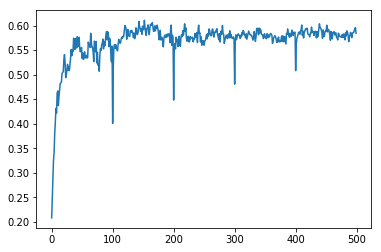

In [39]:
plt.plot(range(len(best_sol_titanic.mean_fitness_evol)), best_sol_titanic.mean_fitness_evol)

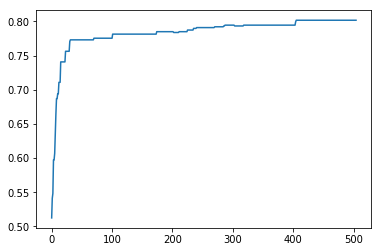

In [40]:
plt.plot(range(len(best_sol_titanic.best_fitness_evol)), best_sol_titanic.best_fitness_evol)

In [41]:
best_sol_ttt = ttt_results_dict['clfGA_ttt_both_pop50_epoc200'][0]

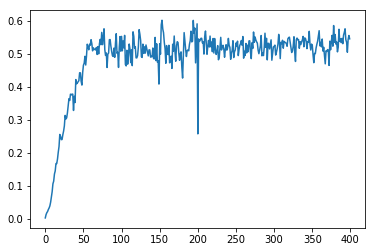

In [42]:
plt.plot(range(len(best_sol_ttt.mean_fitness_evol)), best_sol_ttt.mean_fitness_evol)

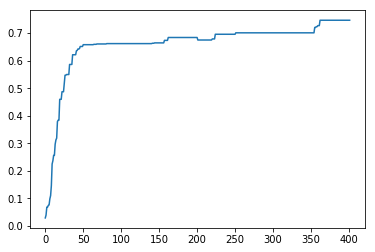

In [43]:
plt.plot(range(len(best_sol_ttt.best_fitness_evol)), best_sol_ttt.best_fitness_evol)

# <font color='red'>5. Análisis ROC: NaiveBayes vs AlgoritmoGenetico </font>